# Q2) Gas Turbine_data :> Problem Statement:
                      predicting turbine energy yield (TEY) using ambient variables as features.


In [1]:
# importing dataset and library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
gf=pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\DATA SCIENCE\\Datasets\\gas_turbines.csv')

In [3]:
gf

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


## EDA

In [4]:
gf.shape

(15039, 11)

In [5]:
gf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
gf.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
df = gf.copy() 
df = df.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)


In [9]:
df.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [10]:
df.isnull().sum()

AT     0
AP     0
AH     0
TEY    0
dtype: int64

## visualization data

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AT', ylabel='Density'>

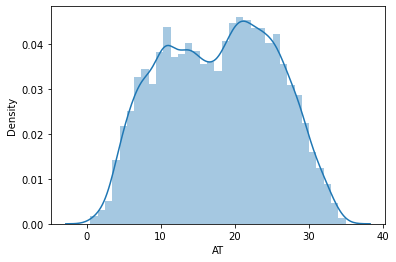

In [11]:
sns.distplot(df["AT"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AP', ylabel='Density'>

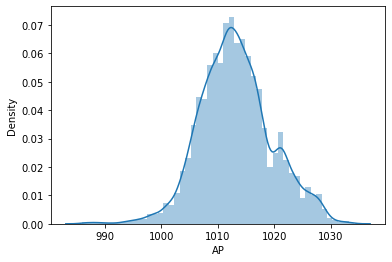

In [12]:
sns.distplot(df["AP"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AH', ylabel='Density'>

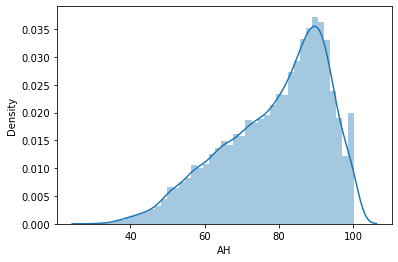

In [13]:
sns.distplot(df['AH'])

## feature Analysis

In [14]:
X =df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [15]:
X

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [16]:
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [17]:
## spliting train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [18]:
y_train=np.reshape(y_train.to_numpy(), (-1,1)) 
y_test=np.reshape(y_test.to_numpy(), (-1,1)) 

In [19]:
y_train

array([[158.59],
       [134.89],
       [135.54],
       ...,
       [158.26],
       [139.82],
       [134.75]])

In [20]:
y_test

array([[133.38],
       [133.81],
       [149.05],
       ...,
       [162.05],
       [133.09],
       [162.34]])

## Minmax Scalar

In [21]:
from sklearn.preprocessing import MinMaxScaler


In [22]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [23]:
print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)

print(scaler_x.fit(X_test))
xtest_scale=scaler_x.transform(X_test)

MinMaxScaler()
MinMaxScaler()


In [24]:
print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)

MinMaxScaler()
MinMaxScaler()


In [25]:
len(xtrain_scale)

10527

## Neural Network Model Building

In [26]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [27]:
model1 = Sequential()
model1.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model1.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, activation='linear'))
# Compile model
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])
# Fit the model
hist1 = model1.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)


Epoch 1/100
48/48 [==============================] - 3s 22ms/step - loss: 0.0734 - mse: 0.0734 - mae: 0.2096 - val_loss: 0.0463 - val_mse: 0.0463 - val_mae: 0.1548
Epoch 2/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0469 - mse: 0.0469 - mae: 0.1554 - val_loss: 0.0451 - val_mse: 0.0451 - val_mae: 0.1489
Epoch 3/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0460 - mse: 0.0460 - mae: 0.1537 - val_loss: 0.0453 - val_mse: 0.0453 - val_mae: 0.1574
Epoch 4/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0457 - mse: 0.0457 - mae: 0.1557 - val_loss: 0.0439 - val_mse: 0.0439 - val_mae: 0.1472
Epoch 5/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0448 - mse: 0.0448 - mae: 0.1532 - val_loss: 0.0431 - val_mse: 0.0431 - val_mae: 0.1478
Epoch 6/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0443 - mse: 0.0443 - mae: 0.1557 - val_loss: 0.0422 - val_mse: 0.0422 - val_mae: 0.1496
Epoch 7/100
48/48 [==

Epoch 51/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0392 - mse: 0.0392 - mae: 0.1591 - val_loss: 0.0386 - val_mse: 0.0386 - val_mae: 0.1553
Epoch 52/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0395 - mse: 0.0395 - mae: 0.1590 - val_loss: 0.0386 - val_mse: 0.0386 - val_mae: 0.1553
Epoch 53/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0391 - mse: 0.0391 - mae: 0.1583 - val_loss: 0.0387 - val_mse: 0.0387 - val_mae: 0.1568
Epoch 54/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0395 - mse: 0.0395 - mae: 0.1602 - val_loss: 0.0390 - val_mse: 0.0390 - val_mae: 0.1583
Epoch 55/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0398 - mse: 0.0398 - mae: 0.1594 - val_loss: 0.0395 - val_mse: 0.0395 - val_mae: 0.1597
Epoch 56/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0393 - mse: 0.0393 - mae: 0.1594 - val_loss: 0.0382 - val_mse: 0.0382 - val_mae: 0.1548
Epoch 57/100
48/

## Model Evaluation

In [ ]:
y_predict = model1.predict(xtest_scale)

print(hist1.history.keys())

In [28]:
hist1_df = pd.DataFrame(hist1.history)
hist1_df["epoch"]=hist1.epoch
hist1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.038646,0.038646,0.157273,0.038002,0.038002,0.154706,95
96,0.039455,0.039455,0.158080,0.037823,0.037823,0.153403,96
97,0.038704,0.038704,0.157613,0.038044,0.038044,0.154180,97
98,0.039422,0.039422,0.159098,0.038233,0.038233,0.154286,98
99,0.038728,0.038728,0.157453,0.037729,0.037729,0.153918,99


## Visualize 

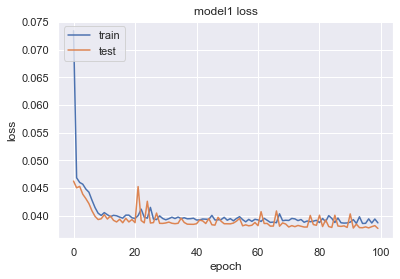

In [29]:

sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

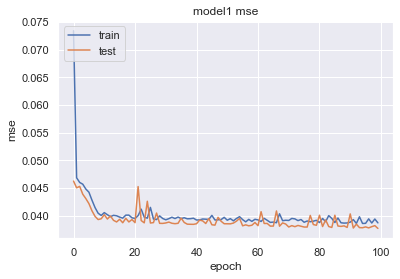

In [30]:
plt.plot(hist1.history['mse'])
plt.plot(hist1.history['val_mse'])
plt.title('model1 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()